<a href="https://colab.research.google.com/github/Rogerio-mack/IMT_CD_2024/blob/main/IMT_ex_bars_solucao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="ITM">
</head>

<img src="https://maua.br/images/selo-60-anos-maua.svg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# Lab: Matplotlib **Distribuição, Quantidades, `Seaborn`**




# Basic imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# **CASE: Beer Production**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-31/beer_states.csv')
df.head()

,state,year,barrels,type
0,AK,2008,2067.69,On Premises
1,AK,2009,2263.65,On Premises
2,AK,2010,1929.15,On Premises
3,AK,2011,2251.02,On Premises
4,AK,2012,2312.43,On Premises


# Q1.

Gere gráficos de barras da produção de barris por ano. Em uma única figura, primeiro gráfico com o matplotlib (use plt.bar()), depois o mesmo gráfico com o seaborn.
A produção de barris vem aumentando ou diminuindo a cada ano?

**Cuidado**

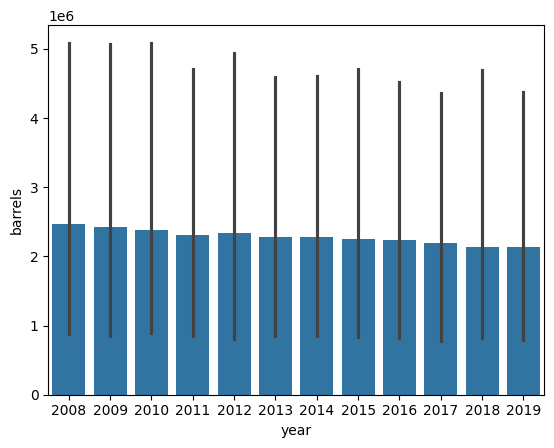

In [ ]:
sns.barplot(x='year', y='barrels', data=df)
plt.show()


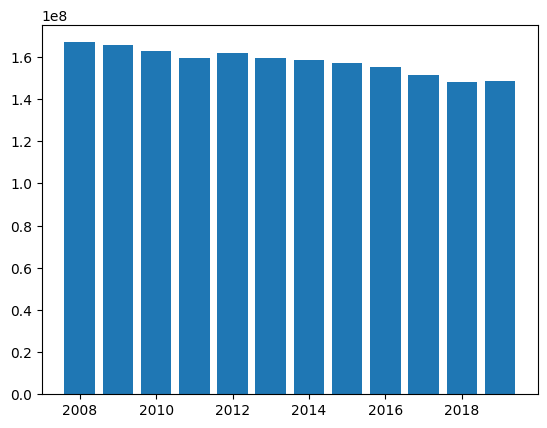

In [ ]:
plt.bar(x='year', height='barrels', data=df)
plt.show()


**Correto**

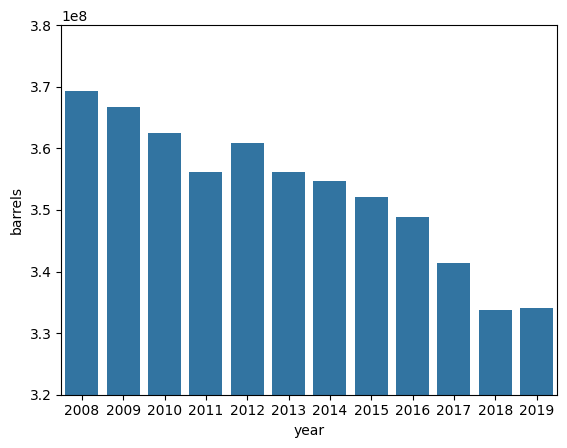

In [ ]:
sns.barplot(x='year', y='barrels', data=df.groupby('year')[['barrels']].sum())
plt.ylim([32e7, 38e7])
plt.show()

In [ ]:
df.groupby('year')['barrels'].sum()

year
2008    3.693657e+08
2009    3.667230e+08
2010    3.624233e+08
2011    3.561490e+08
2012    3.608027e+08
2013    3.561728e+08
2014    3.547738e+08
2015    3.520821e+08
2016    3.488605e+08
2017    3.413586e+08
2018    3.337783e+08
2019    3.341545e+08
Name: barrels, dtype: float64

# Q2.

Gere gráficos de barras da produção de barris por estado. Em uma única figura, primeiro gráfico com o matplotlib (use plt.bar()), depois o mesmo gráfico com o seaborn. Quais os 3 estados com maior produção de barris no ano de 2019?

**Cuidado**

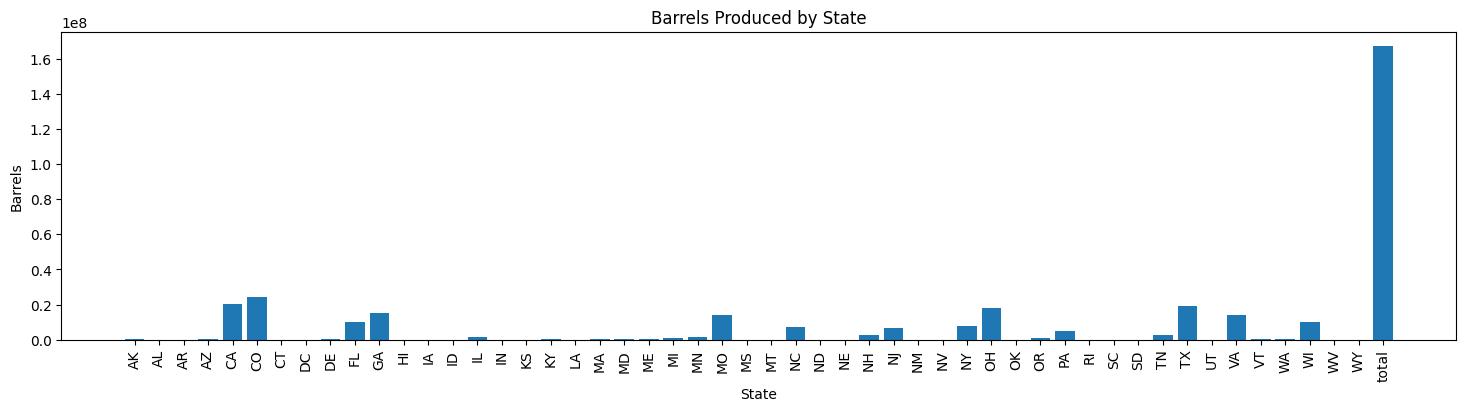

In [ ]:
plt.figure(figsize=(18,4))

plt.bar(df.state, df.barrels)
plt.xlabel('State')
plt.ylabel('Barrels')
plt.title('Barrels Produced by State')
plt.xticks(rotation=90)
plt.show()


**Correto**

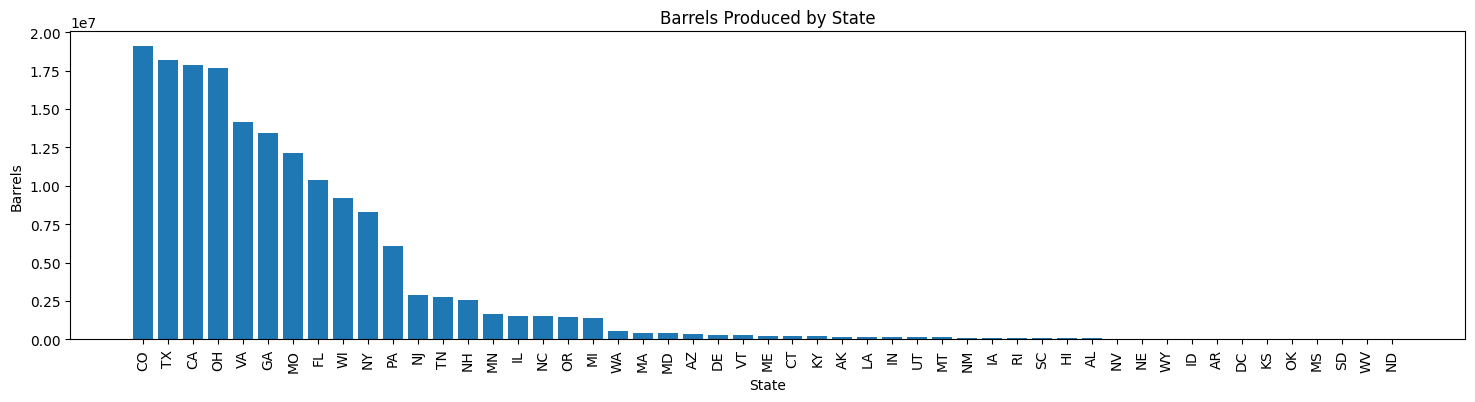

In [ ]:
plt.figure(figsize=(18,4))
df_barrels_by_state = df[ (df.state != 'total') & (df.year == 2019) ].groupby('state')['barrels'].sum().sort_values(ascending=False)

plt.bar(df_barrels_by_state.index, df_barrels_by_state.values)
plt.xlabel('State')
plt.ylabel('Barrels')
plt.title('Barrels Produced by State')
plt.xticks(rotation=90)
plt.show()



# Q3.

Gere gráficos de barras da produção de barris por estado. Para os 3 estados da questão anterior, faça um gráfico de barras com a produção dos últimos 3 anos por estado e por ano. Qual desses maiores produtores do ano de 2019 teve produção decrescente no período?

**Cuidado**

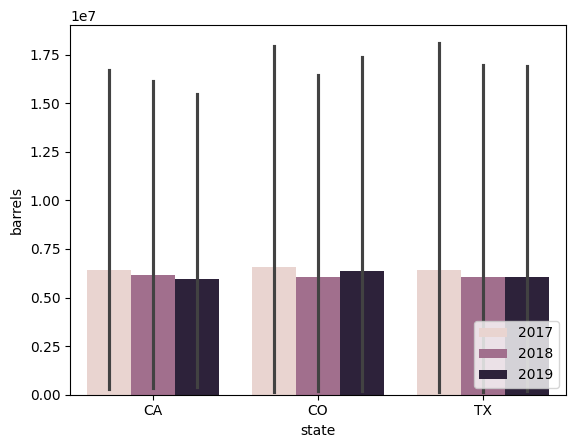

In [ ]:
sns.barplot(x = 'state', y = 'barrels', hue = 'year',
            data = df[df['state'].isin(['TX', 'CO', 'CA']) & (df['year'] >= 2017)])
plt.legend(loc='lower right')
plt.show()


**Correto**

In [ ]:
df_3 = df[df['state'].isin(['TX', 'CO', 'CA']) & (df['year'] >= 2017)].groupby(['state', 'year'])['barrels'].sum().reset_index()
df_3

,state,year,barrels
0,CA,2017,19177049.14
1,CA,2018,18536648.88
2,CA,2019,17872597.37
3,CO,2017,19688220.10
4,CO,2018,18232502.25
5,CO,2019,19097585.18
6,TX,2017,19311603.51
7,TX,2018,18219321.08
8,TX,2019,18187258.36


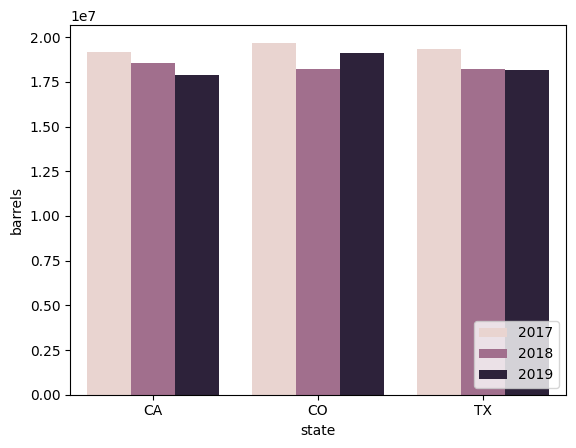

In [ ]:
sns.barplot(x = 'state', y = 'barrels', hue = 'year', data = df_3)
plt.legend(loc='lower right')
plt.show()

# **CASE: Boston Housing Dataset**

Os exercícios a seguir empregam o dataset Boston Housing Dataset. Este é um conjunto de dados coletado pelo US Census Service (1993) sobre moradias na área de Boston, MA. Estão presentes os seguintes dados das

- CRIM - taxa de criminalidade per capita por cidade
- ZN - proporção de terreno residencial zoneada para lotes acima de 25.000 m2.
- INDUS - proporção de hectares de negócios não varejistas por cidade.
- CHAS - Variável fictícia Charles River (1 se a área limita o rio; 0 caso contrário)
- NOX - concentração de óxidos nítricos (partes por 10 milhões)
- RM - número médio de divisões por habitação
- AGE - proporção de unidades ocupadas pelo proprietário construídas antes de 1940
- DIS - distâncias ponderadas para cinco centros de emprego de Boston
- RAD - índice de acessibilidade às rodovias radiais
- TAX - valor total do imposto predial por USD\$ 10.000
- PTRATIO - relação aluno-professor por município
B - 1000(Bk - 0,63)^2 onde Bk é a proporção de negros por cidade
- LSTAT - % de status inferior da população
- MEDV - Valor médio de casas ocupadas pelo proprietário em US\$ 1.000

In [ ]:
df = pd.read_csv('https://github.com/Rogerio-mack/IMT_Ciencia_de_Dados/raw/main/data/BostonHousing.csv')
df.drop(columns='b',inplace=True)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


# Q4. Valores médios

Qual índice de acessibilidade às rodovias radiais apresenta em média preços de casas maiores?

**Extra**: Você saberia corrigir o gráfico do `matplotlib` para uma melhor apresentação com os valores médios de cada `rad`? Dica: empregue `set_xticks()`.

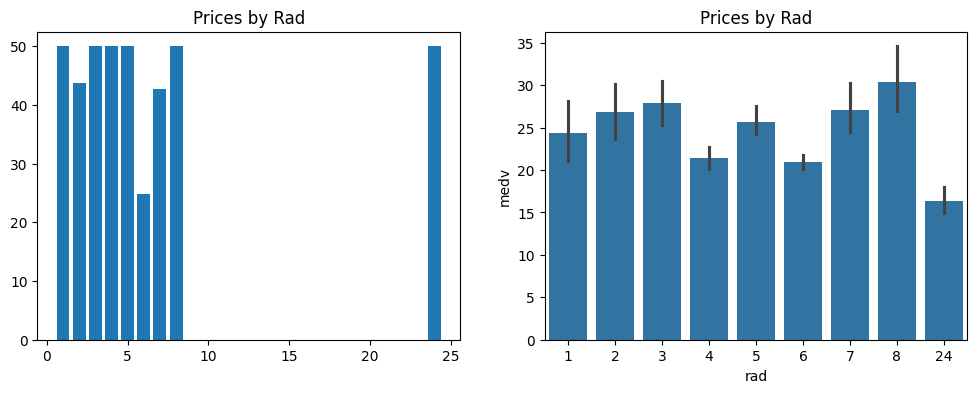

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(12,4))

# depois tente empregar df2 no matplotlib e entenda a diferença
# df2 = df.copy()
# df2.rad = df.rad.astype('str')


ax[0].bar(x='rad',height='medv',data=df)
ax[0].set_title('Prices by Rad')

sns.barplot(x='rad',y='medv',data=df,ax=ax[1])
ax[1].set_title('Prices by Rad')

plt.show()

In [ ]:
df_group= df.groupby('rad').medv.mean()
df_group

rad
1     24.365000
2     26.833333
3     27.928947
4     21.387273
5     25.706957
6     20.976923
7     27.105882
8     30.358333
24    16.403788
Name: medv, dtype: float64

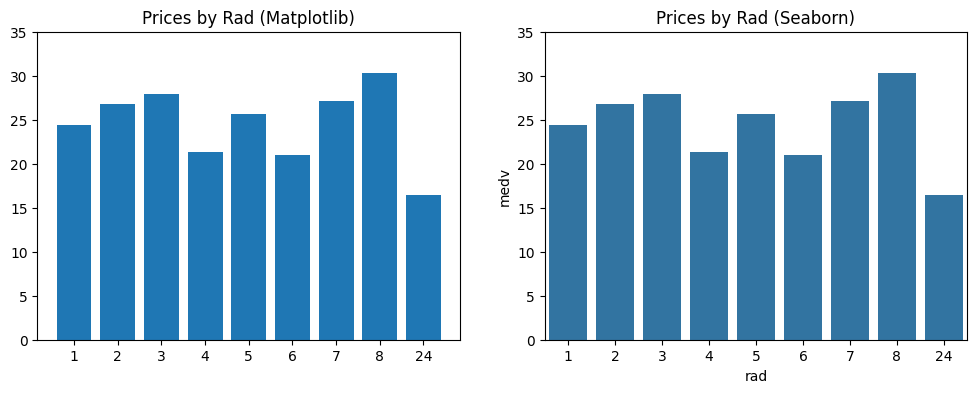

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(12,4))

ax[0].bar(x=np.arange(0,len(df_group)),height=df_group)
ax[0].set_xticks(np.arange(0,len(df_group)), labels=df_group.index)
ax[0].set_title('Prices by Rad (Matplotlib)')
ax[0].set_ylim([0,35])

sns.barplot(x='rad',y='medv',data=df,ax=ax[1],errorbar=None)
ax[1].set_title('Prices by Rad (Seaborn)')
ax[1].set_ylim([0,35])

plt.show()

# Q5. Incerteza

Muitas vezes o valores médios apresentados nos gráficos anteriores podem esconder discrepâncias, como no caso de haver poucas instâncias de dados para um determinado `rad`. Faça um gráfico de barras para identificar os valores de casas que apresentam maior e menor incerteza.

Para que índices de acessibilidade os valores apresentados das casas apresentam maior e menor incerteza?

Você poderia pensar em empregar um histograma... mas não parece uma boa ideia.

**Cuidado**

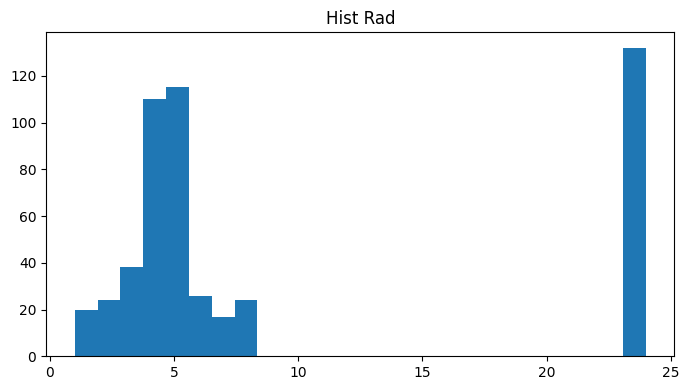

In [ ]:
fig, ax = plt.subplots(figsize=(7,4))

ax.hist(x=df.rad,bins=25)
ax.set_title('Hist Rad')

plt.tight_layout()
plt.show()

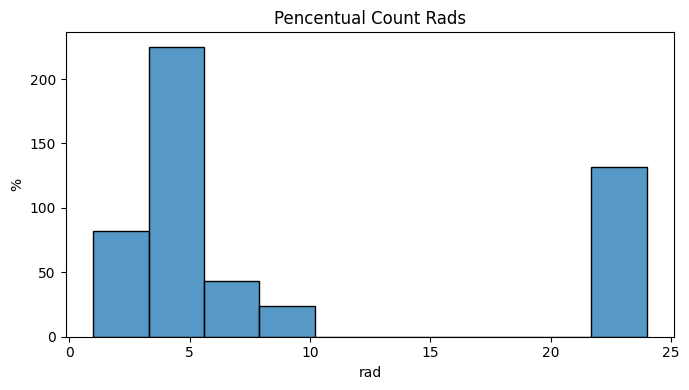

In [ ]:
fig, ax = plt.subplots(figsize=(7,4))

ax = sns.histplot(x='rad',data=df)
ax.set_title('Pencentual Count Rads')
ax.set_ylabel('%')

plt.tight_layout()
plt.show()

Uma boa solução nestes casos é empregarmos `sns.countplot()`, caso você conheça esta função...

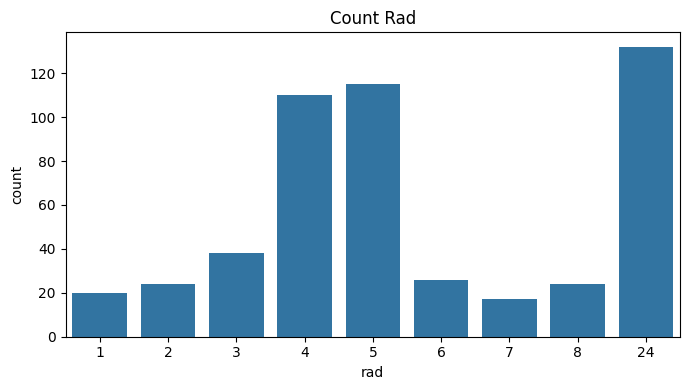

In [ ]:
fig, ax = plt.subplots(figsize=(7,4))

sns.countplot(x=df.rad,ax=ax)
ax.set_title('Count Rad')

plt.tight_layout()
plt.show()

Ou você ainda pode construir um gráfico de barras para isso...

In [ ]:
df_group = np.round( df.groupby('rad')['rad'].count() / len(df) * 100 , 2 )
df_group

rad
1      3.95
2      4.74
3      7.51
4     21.74
5     22.73
6      5.14
7      3.36
8      4.74
24    26.09
Name: rad, dtype: float64

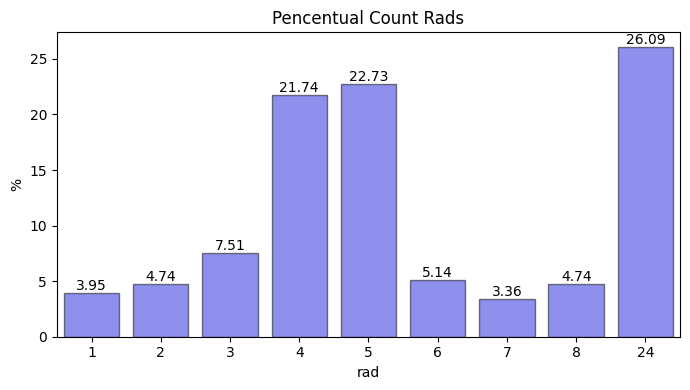

In [ ]:
fig, ax = plt.subplots(figsize=(7,4))

ax = sns.barplot(x=df_group.index,y=df_group,ax=ax,color='blue',edgecolor='k',alpha=0.5)
ax.set_title('Pencentual Count Rads')
ax.set_ylabel('%')
ax.bar_label(ax.containers[0], fontsize=10);

plt.tight_layout()
plt.show()

# Q6. Incerteza II

A incerteza também pode ser causada pela presença de *outliers* nos dados. Faça um gráfico de distribuição dos preços para cada índice de acessibilidade, com `matplotlib` e o equivalente com o `seaborn`, ambos na mesma figura no modo `artist layer`.

A. Para que índices de acessibilidade apresentam preços com  mais incerteza por esse critério?

B. Para que índices de acessibilidade apresentam preços com  maior possibilidade de valores discrepantes para baixo?

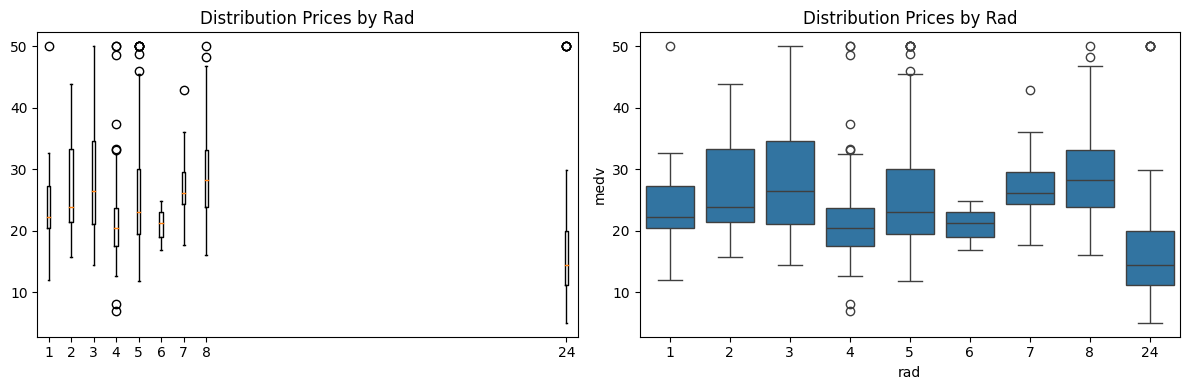

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(12,4))

for r in df['rad'].unique():
  ax[0].boxplot(df[df.rad == r]['medv'], positions=[r])

ax[0].set_title('Distribution Prices by Rad')

sns.boxplot(x='rad',y='medv',data=df,ax=ax[1])
ax[1].set_title('Distribution Prices by Rad')

plt.tight_layout()
plt.show()

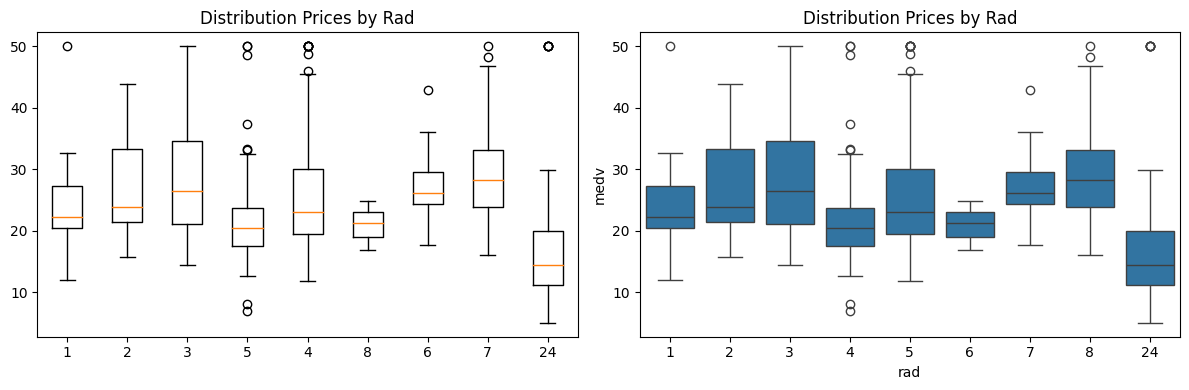

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(12,4))

data = []
# for r in df['rad'].unique():
for r in sorted(df['rad'].unique()):
  data.append(df[df.rad == r]['medv'])

ax[0].boxplot(data)
ax[0].set_title('Distribution Prices by Rad')
ax[0].set_xticks(np.arange(1,len(df_group)+1), labels=df['rad'].unique())

sns.boxplot(x='rad',y='medv',data=df,ax=ax[1])
ax[1].set_title('Distribution Prices by Rad')

plt.tight_layout()
plt.show()

# Q7. Incerteza III

Outro aspecto importante sobre os dados é a sua distribuição. Faça os gráficos de distribuição dos seguintes valores:

```
['crim', 'indus', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat', 'medv']
```

Epregue múltiplos gráficos na mesma figura e o `seaborn`. Em seguida responda as perguntas e poste sua figura .png no Canvas.

A. Qual atributo apresenta uma distribuição claramente bimodal?

B. Qual atributo apresenta uma distribuição mais próxima da normal?

Q. Qual é aproximadamente a probabilidade um imóvel estar a menos de 5 milhas dos centros de emprego? (É uma análise gráfica, pense em valores aproximados tipo menos que 0.25, entre 0.25 a 0.5, maior que 0.9, etc.)

Q. Qual é aproximadamente a probabilidade um imóvel ter um preço inferior a USD 22000? (É uma análise gráfica, pense em valores aproximados tipo menos que 0.25, entre 0.25 a 0.5, maior que 0.9, etc.)


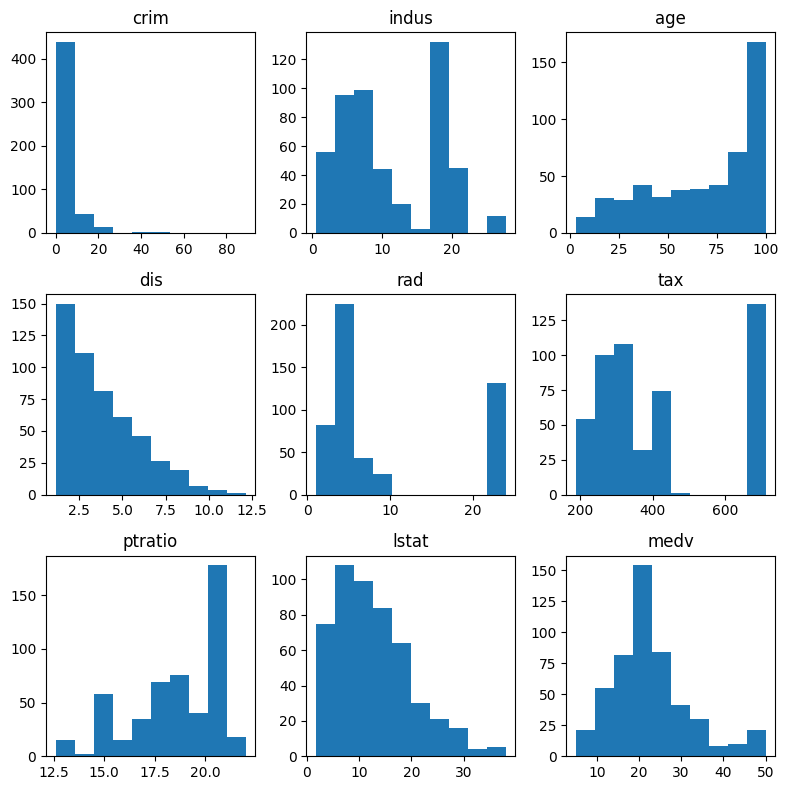

In [ ]:
fig, axis = plt.subplots(3,3, figsize=(8,8))

ax = axis.reshape(-1)

cols = ['crim', 'indus', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat', 'medv']

for i in range(len(cols)):
  ax[i].hist(df[cols[i]])
  ax[i].set_title(cols[i])

plt.tight_layout()
plt.show()

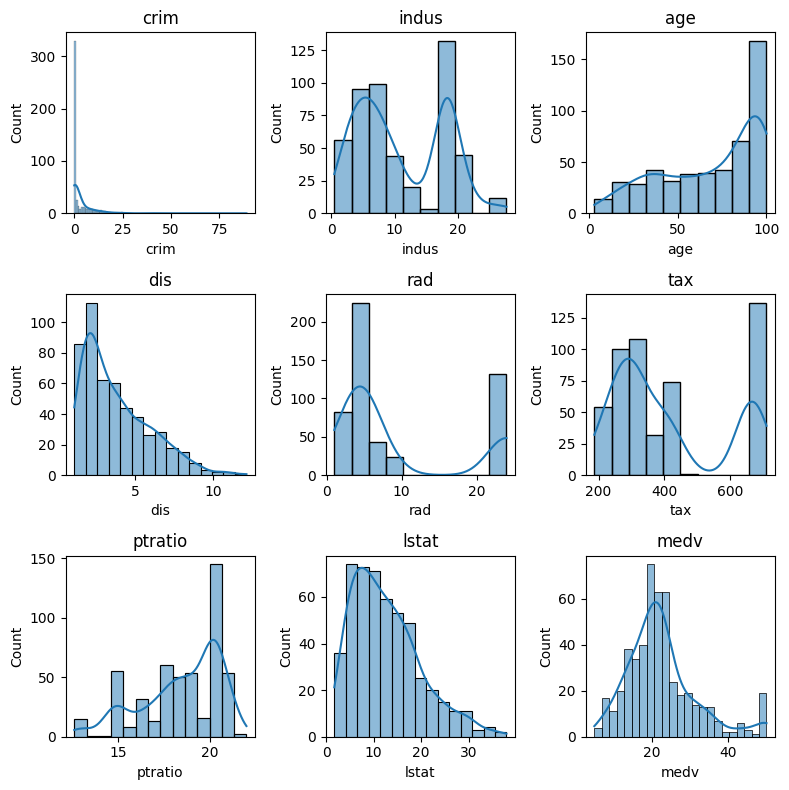

In [ ]:
fig, axis = plt.subplots(3,3, figsize=(8,8))

ax = axis.reshape(-1)

cols = ['crim', 'indus', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat', 'medv']

for i in range(len(cols)):
  sns.histplot(df[cols[i]],ax=ax[i],kde=True)
  ax[i].set_title(cols[i])

plt.tight_layout()
plt.show()

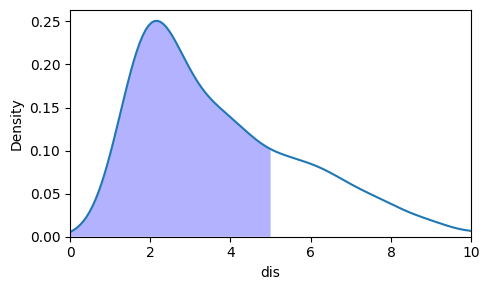

In [ ]:
plt.figure(figsize=(5,3))

from scipy.stats import gaussian_kde

x = np.linspace(0,5,100)
prob = gaussian_kde(df['dis'])(x)

a = sns.kdeplot(df['dis'])

plt.fill_between(x,prob, facecolor='blue', alpha=0.3)
plt.xlim([0,10])

plt.tight_layout()
plt.show()

In [ ]:
df['dis'].describe()

count    506.000000
mean       3.795043
std        2.105710
min        1.129600
25%        2.100175
50%        3.207450
75%        5.188425
max       12.126500
Name: dis, dtype: float64

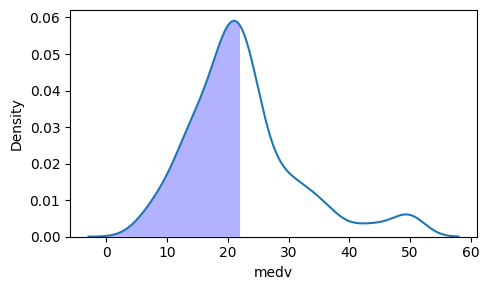

In [ ]:
plt.figure(figsize=(5,3))

from scipy.stats import gaussian_kde

x = np.linspace(0,22,100)
prob = gaussian_kde(df['medv'])(x)

a = sns.kdeplot(df['medv'])

plt.fill_between(x,prob, facecolor='blue', alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
df['medv'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: medv, dtype: float64